# Ejercicio de programación Regresión Lineal Multiple

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Ejercicio de programación Regresión Lineal Multiple

In [64]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot 
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

import pandas as pd
from sklearn.preprocessing import LabelEncoder

from faker import Faker

from datetime import datetime

import numpy as np
from sklearn.datasets import make_classification

from random import shuffle

from sklearn.mixture import GaussianMixture
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline




In [65]:
''' Recuperación y Limpieza de datos'''
# Archivos csv
loadData = pd.read_csv('/content/drive/MyDrive/datasets/dataset.csv')

# Archivos txt
# data = np.loadtxt('ex2data1.txt', delimiter=',')

''' SIRVE PARA CONVERTIR LOS DATOS A MINUSCULAS '''
# loadData['is_genuine'] = loadData['is_genuine'].str.lower()

'''PARA VERIFICAR DE QUE TIPO SON LOS DATOS (STRIGN, FLOAT, INT, ETC)'''
# print(loadData['Date'].dtype)


'''MAPEO AUTOMATICO DE DATOS'''
# def load_csv_dataset(dataset, modifyColumns):
#     # Cargar el archivo CSV en un DataFrame de Pandas
#     data = dataset

#     # Modificar columnas según la lógica deseada
#     columns = data.columns
#     mappings = {}  # Diccionario para almacenar los mapeos

#     for index in modifyColumns:
#         name = columns[index]
#         unique_values = list(data[name].unique())
#         value_map = dict(zip(unique_values, [i for i in range(len(unique_values))]))
#         data[name] = data[name].map(value_map)
#         mappings[name] = value_map  # Almacenar el mapeo en el diccionario

#     return data, mappings

# Se introducen los datos NO se modificaran
# cleanData, mappings = load_csv_dataset(loadData, [i for i in range(0,21) if not i in [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]])

# print(mappings)
# print(loadData.head())
# print(cleanData.head())


'''MAPEO DE DATOS'''
# mapeo_genuine = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
# loadData['class'] = loadData['class'].map(mapeo_genuine)


'''MAPEO DE FECHAS Y DATOS AUTOMATICO'''
columnas_categoricas = loadData.select_dtypes(include=['object']).columns
# columnas_fechas = loadData.select_dtypes(include=['datetime64']).columns

# for columna in columnas_fechas:
#   loadData[columna] = pd.to_numeric(loadData[columna].map(datetime.timestamp))


# for columna in columnas_categoricas:
#   le = LabelEncoder()
#   loadData[columna] = le.fit_transform(loadData[columna])




loadData['Date'] = pd.to_datetime(loadData['Date'])

loadData['Date'] = loadData['Date'].dt.year


'''RELLENAR CON LA MEDIA ESPACIOS VACIOS'''

# median_margin_up = loadData['margin_up'].median()
# filled_data = loadData.fillna({'margin_up': median_margin_up})


'''RELLENAR CON LA MEDIA ESPACIOS VACIOS DE TODAS LAS COLUMNAS'''''
#llenar datos vacios
vacios = ['Date', 'CNY=X', 'OMR=X', 'IRR=X', 'THB=X', 'SYP=X', 'EUR=X', 'MYR=X',
       'YER=X', 'VND=X', 'ILS=X', 'JPY=X', 'LKR=X', 'IQD=X', 'PKR=X', 'KWD=X',
       'KHR=X', 'UZS=X', 'SGD=X', 'INR=X', 'BDT=X', 'PHP=X', 'JOD=X', 'LAK=X',
       'IDR=X', 'KRW=X', 'KZT=X', 'AED=X', 'BHD=X', 'LBP=X', 'TRY=X', 'TMT=X',
       'SAR=X', 'MVR=X', 'QAR=X', 'MMK=X', 'NPR=X', 'BND=X', 'AFN=X']
media_columnas = loadData[vacios].mean()
loadData[vacios] = loadData[vacios].fillna(media_columnas)


'''MUESTRA LA CANTIDAD DE LOS VALORES UNICOS DE LA COLUMNA'''
# conteo_valores = loadData['Country'].value_counts()
# print(conteo_valores)




# Cargar el dataset en un dataframe


# Convertir la columna de fechas a tipo datetime
# loadData['Date'] = pd.to_datetime(loadData['Date'])

# # Crear una nueva columna con las fechas en formato de cadena
# loadData['Date'] = loadData['Date'].dt.strftime('%d/%m/%Y')

# Imprimir el dataframe resultante
# print(df)

'''ELIMINAR FILAS CON DATOS VACIOS'''
# num_column= loadData.shape[1]
# cleanData = loadData[loadData.columns].dropna(thresh=num_column)


'''PARA VERIFICAR QUE LOS DATOS SEAN UNICOS (muestra los datos encontrados en este caso, false y true)'''
# print(loadData['Country'].unique())


'''PARA ELIMINAR LAS COLUMNAS INNECESARIAS'''
# column_innecesary = ['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']
# cleanData = loadData.drop(column_innecesary, axis=1)

'''MEZCLAR LAS FILAS DE MANERA ALEATORIA'''
# Convertir el dataframe a una lista de filas
rows = loadData.values.tolist()

# Mezclar las filas de manera aleatoria
shuffle(rows)

# Crear un nuevo dataframe con las filas mezcladas
loadData = pd.DataFrame(rows, columns=loadData.columns)

# print(shuffled_data)

'''INFO DE LOS DATOS'''
loadData.info()

# print(loadData.head)

# visualiar el menor y maximo valor
# columna = cleanData['percentage_expenditure']
# valor_minimo = columna.min()
# valor_maximo = columna.max()
# print("Valor mínimo:", valor_minimo)
# print("Valor máximo:", valor_maximo)


# print(loadData.columns)

# print(loadData.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   float64
 1   CNY=X   4956 non-null   float64
 2   OMR=X   4956 non-null   float64
 3   IRR=X   4956 non-null   float64
 4   THB=X   4956 non-null   float64
 5   SYP=X   4956 non-null   float64
 6   EUR=X   4956 non-null   float64
 7   MYR=X   4956 non-null   float64
 8   YER=X   4956 non-null   float64
 9   VND=X   4956 non-null   float64
 10  ILS=X   4956 non-null   float64
 11  JPY=X   4956 non-null   float64
 12  LKR=X   4956 non-null   float64
 13  IQD=X   4956 non-null   float64
 14  PKR=X   4956 non-null   float64
 15  KWD=X   4956 non-null   float64
 16  KHR=X   4956 non-null   float64
 17  UZS=X   4956 non-null   float64
 18  SGD=X   4956 non-null   float64
 19  INR=X   4956 non-null   float64
 20  BDT=X   4956 non-null   float64
 21  PHP=X   4956 non-null   float64
 22  

In [66]:
'''DATOS SINTETICOS'''
# fake = Faker()
# synthetic_data = []
# for _ in range(30):
#     country = fake.country()
#     year = fake.random_int(min=2000, max=2015)
#     status = fake.random_element(['Developed', 'Developing'])
#     life_expectancy = fake.pyfloat(left_digits=2, right_digits=2, min_value=36.2, max_value=90)
#     synthetic_data.append([country, year, status, life_expectancy])
    
# # Convertir los datos sintéticos en un DataFrame
# synthetic_data = pd.DataFrame(synthetic_data, columns=['Country', 'Year', 'Status', 'Life Expectancy '])

# # Agregar los datos sintéticos al dataset existente
# data = pd.concat([loadData, synthetic_data], ignore_index=True)

# # Guardar el dataset actualizado en un nuevo archivo
# data.to_csv('life_expectancy_updated.csv', index=False)




'DATOS SINTETICOS'

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [67]:
# Cargar datos


'''
ESTUDIANTE: Victoria Avila Carlos Osmar
CARRERA: Ingeniería en Ciencias de la Computación
CU: 111-333


'''
# Total de tados en el dataset 2.864 rows.
# 2.577 rows para entrenamiento (90%)
# 287 rows para test (10%) (el test se realiza al final del notebook)


#Omite la parte de los encabezados
data = loadData.values

# X = data[:, 0]
# y = data[:, 1:]

# print(X[3:4,:])
# print(y[3:4])


# print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]',
#                                                                                          'X[:,11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:,18]', 'X[:, 20]', 'y'))
# print('-'*27)
# for i in range(10):
#     print('{:8.0f}{:8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], X[i, 9], X[i, 10], 
                                                                                                                #   X[i, 11], X[i, 12], X[i, 13], X[i, 14], X[i, 15], X[i, 16], X[i, 17], X[i, 18], X[i, 19], X[i, 20] ,y[i]))
# X, y = make_classification(n_samples=1000, n_features=21, random_state=42)



'''TERCER MÉTODO'''

# Cantidad de datos sintéticos a generar
num_samples = 10000

# Verificar que el número de datos sintéticos sea par
if num_samples % 2 != 0:
    num_samples += 1

# Generar índices aleatorios para seleccionar pares de filas
random_indices = np.random.choice(range(len(data)), size=(num_samples // 2, 2), replace=True)
# Calcular la media de características para cada par de filas seleccionadas
mean_values = np.mean(data[random_indices], axis=1)
# Generar datos sintéticos utilizando las medias de características
synthetic_data = np.tile(mean_values, (1, 1, 1))
# Redimensionar y aplanar los datos sintéticos
synthetic_data = synthetic_data.reshape(-1, data.shape[1])
# Combinar los datos originales y los datos sintéticos
combined_data = np.concatenate((data, synthetic_data), axis=0)
# Imprimir los datos combinados
print(combined_data)
amount_rows = combined_data.shape[0]


# 90% de los datos para entrenamiento
train_rows= int(round(amount_rows * 0.9))

X = data[:train_rows, 1:]
y = data[:train_rows, 0]

# x,xi = combined_data[:, :3], combined_data[:train_rows, 4:]
# X = np.concatenate((x,xi), axis=1)
# y = combined_data[:, 3]
m = y.size



'''SEGUNDO MÉTODO'''

# num_samples = len(X)

# # Calcular la cantidad de datos adicionales que necesitas generar
# num_additional_samples = 50000 - num_samples

# # Calcular el promedio aritmético de cada característica en 'X'
# mean_values = np.mean(X, axis=0)

# # Generar datos adicionales utilizando el promedio aritmético
# additional_data = np.tile(mean_values, (num_additional_samples, 1))

# # Agregar los datos adicionales a 'X' y las etiquetas correspondientes a 'y'
# X = np.concatenate((X, additional_data), axis=0)
# y = np.concatenate((y, np.tile(y[0], (num_additional_samples,))), axis=0)

# # Verificar que se haya alcanzado la cantidad deseada de datos (50000)
# X = X[:50000]

# y = y[:50000]


'''PRIMER MÉTODO'''
# # Generar datos sintéticos basados en la distribución del conjunto original
# n_samples_synthetic = 500  # Número de muestras sintéticas a generar
# X_synthetic, y_synthetic = make_classification(n_samples=n_samples_synthetic, n_features=21, random_state=42) #n_classes=3 (clases paa onve vs all)


# # Combinar los datos originales y sintéticos
# X_combined = np.concatenate((X, X_synthetic), axis=0)
# y_combined = np.concatenate((y, y_synthetic), axis=0)

# print(X[3:4,:])

# print(X_combined.shape)
# print(y_combined.shape)
# amount_rows = X_combined.shape[0]
# # 90% de los datos para entrenamiento
# train_rows= int(round(amount_rows * 0.9))
# X = X_combined[:train_rows, :]
# y = y_combined[:train_rows]
# m = y.size



# data = cleanData.values
# amount_rows = cleanData.shape[0]
# train_rows= int(round(amount_rows * 0.9))
# x,xi = data[:train_rows, :3], data[:train_rows, 4:]
# X = np.concatenate((x,xi), axis=1)
# y = data[:train_rows, 18]
# m = y.size








# imprimir algunos puntos de datos
# print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]',
#                                                                                          'X[:,11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:,18]', 'X[:, 20]', 'y'))
# print('-'*27)
# for i in range(10):
#     print('{:8.0f}{:8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], X[i, 9], X[i, 10], 
#                                                                                                                   X[i, 11], X[i, 12], X[i, 13], X[i, 14], X[i, 15], X[i, 16], X[i, 17], X[i, 18], X[i, 19], X[i, 20] ,y[i]))

[[2.01700000e+03 6.65000000e+00 3.80000000e-01 ... 1.02940000e+02
  1.35000000e+00 6.75400000e+01]
 [2.02100000e+03 6.44000000e+00 3.80000000e-01 ... 1.16030000e+02
  1.32000000e+00 8.38300000e+01]
 [2.01400000e+03 6.20000000e+00 3.80000000e-01 ... 9.50300000e+01
  1.25000000e+00 5.65200000e+01]
 ...
 [2.01550000e+03 6.73000000e+00 3.80000000e-01 ... 9.94450000e+01
  1.29500000e+00 6.28000000e+01]
 [2.00750000e+03 7.27500000e+00 3.80000000e-01 ... 7.14750000e+01
  1.47000000e+00 1.27300750e+02]
 [2.01250000e+03 6.95500000e+00 3.80000000e-01 ... 8.27450000e+01
  1.40500000e+00 9.80503748e+01]]


'PRIMER MÉTODO'

# New Section

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar. 

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (tamaño de las casas) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de los tamaños de las casas.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $. 

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir los precios de casas que no se han visto antes. Dado un nuevo valor de x (area del living room y el numero de dormitorios), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [68]:
# FUNCION DE NORMALIZAR
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [69]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[6.65000000e+00 3.80000000e-01 3.31590000e+04 ... 1.02940000e+02
  1.35000000e+00 6.75400000e+01]
 [6.44000000e+00 3.80000000e-01 4.20000000e+04 ... 1.16030000e+02
  1.32000000e+00 8.38300000e+01]
 [6.20000000e+00 3.80000000e-01 2.18008762e+04 ... 9.50300000e+01
  1.25000000e+00 5.65200000e+01]
 ...
 [7.64000000e+00 3.80000000e-01 9.07350000e+03 ... 6.32700000e+01
  1.51000000e+00 1.27300750e+02]
 [8.08000000e+00 3.80000000e-01 9.03600000e+03 ... 6.42000000e+01
  1.65000000e+00 1.27300750e+02]
 [6.48000000e+00 3.80000000e-01 4.20000000e+04 ... 1.17650000e+02
  1.34000000e+00 8.02300000e+01]]
Media calculada: [6.88644809e+00 3.79989891e-01 2.18008762e+04 3.35895332e+01
 1.48981478e+02 8.11288555e-01 3.71242724e+00 2.20234922e+02
 1.99626755e+04 3.78029233e+00 1.05754261e+02 1.42562357e+02
 1.22634626e+03 1.20673516e+02 2.91268035e-01 3.97781253e+03
 4.08926415e+03 1.40258704e+00 5.76787797e+01 7.48103500e+01
 4.82873060e+01 7.07211228e-01 8.75127327e+03 1.14994181e+04
 1.11741741e+03 2

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [70]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [71]:
print(X)

[[ 1.         -0.36584186  0.01238962 ...  0.62341889 -0.08201871
  -0.04629178]
 [ 1.         -0.69076219  0.01238962 ...  1.28862797 -0.25885583
  -0.03367325]
 [ 1.         -1.06209971  0.01238962 ...  0.22144762 -0.67147578
  -0.05482808]
 ...
 [ 1.          1.16592541  0.01238962 ... -1.39253561  0.86111261
   0.        ]
 [ 1.          1.84671087  0.01238962 ... -1.34527477  1.68635251
   0.        ]
 [ 1.         -0.6288726   0.01238962 ...  1.37095331 -0.14096441
  -0.03646188]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`. 
</div>

<a id="computeCostMulti"></a>

In [72]:
# CALCULA EL COST 'J'
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [73]:
# AJUSTA LAS TITAS
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 2.01299818e+03 -8.39817095e-01 -3.02281525e-02  3.17036957e-01
 -5.74782317e-01 -3.04654777e-01  6.45047127e-01  6.97730808e-01
  4.18322775e-02  2.35617171e-01 -6.21289371e-01 -1.94608352e-02
  4.80443034e-02  5.68674220e-02 -2.37212682e-04  2.77154520e-01
 -5.63819459e-03  6.33776870e-01 -6.70099846e-01  5.55525036e-01
  5.28298000e-01  1.48978666e-01 -1.88698063e-03 -4.08564692e-02
  7.12687172e-01 -2.45769398e-01  6.50454785e-01  1.01624980e-02
 -6.94596510e-03  1.48235678e-02 -3.36310255e-02 -1.28036555e-01
  2.61853187e-02 -5.95312888e-02 -7.14095209e-03  3.66196757e-01
 -5.51717582e-01 -2.66428497e-02 -6.44970265e-03]
Costo final del descenso por el gradiente: 0.110


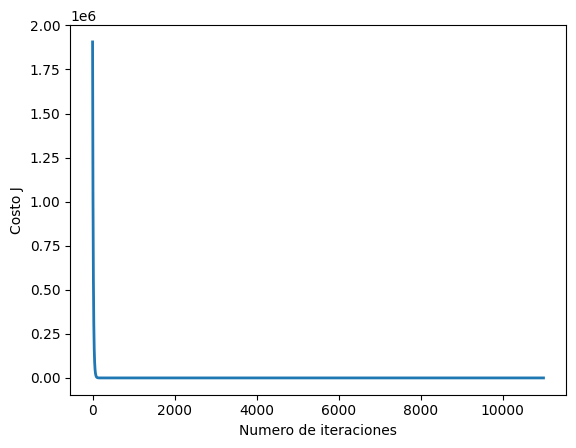

In [74]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03 # alpha = 0.003
# numero de iteraciones
num_iters = 11000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(39)

# Se calculan las TITAS y el COSTO
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print('Costo final del descenso por el gradiente: {:0.3f}'.format(J_history[-1]))   




# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [75]:

# SE RECUPERA EL OTRO PORSENTAJE DEL DATASET
test_rows= int(round(amount_rows * 0.1))
X_test = data[test_rows:, 1:]
y_test= data[test_rows:,0]
m = y_test.size

X_norm, mu, sigma = featureNormalize(X_test)
X_final = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
y_test = np.dot(X_final, theta)  

# print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(Life_Expectancy == Life_Expectancy_data) * 100))



In [76]:
# impresion de los datos predecidos y los reales para su comparación
for i in range(test_rows):
    print("Ejemplo", i+1, "- Predicción:", y_test[i], "- Valor real:", y[i])


Ejemplo 1 - Predicción: 2013.7021272769305 - Valor real: 2017.0
Ejemplo 2 - Predicción: 2007.2198861155998 - Valor real: 2021.0
Ejemplo 3 - Predicción: 2015.950039688604 - Valor real: 2014.0
Ejemplo 4 - Predicción: 2016.1119935765862 - Valor real: 2008.0
Ejemplo 5 - Predicción: 2006.369168635358 - Valor real: 2011.0
Ejemplo 6 - Predicción: 2012.350754260716 - Valor real: 2013.0
Ejemplo 7 - Predicción: 2008.625841914533 - Valor real: 2020.0
Ejemplo 8 - Predicción: 2004.3872267047016 - Valor real: 2020.0
Ejemplo 9 - Predicción: 2011.6722005350232 - Valor real: 2010.0
Ejemplo 10 - Predicción: 2009.8297664321235 - Valor real: 2006.0
Ejemplo 11 - Predicción: 2010.4219768656037 - Valor real: 2011.0
Ejemplo 12 - Predicción: 2020.9616574544098 - Valor real: 2004.0
Ejemplo 13 - Predicción: 2009.6569610108165 - Valor real: 2017.0
Ejemplo 14 - Predicción: 2006.1894748561624 - Valor real: 2006.0
Ejemplo 15 - Predicción: 2017.0986125048055 - Valor real: 2018.0
Ejemplo 16 - Predicción: 2009.18616396

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [77]:
# Cargar datos

#lee el los valores del archivo csv

#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
# 90% de los datos para entrenamiento
train_rows= int(round(amount_rows * 0.9))
X = data[:train_rows, :11]
y = data[:train_rows, 18]
m = y.size
X, mu, sigma = featureNormalize(X)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

FileNotFoundError: ignored

In [ ]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios


In [ ]:
# Pueba con el 10% que queda de elementos para la esperanza de vida como Y 

#lee el los valores del archivo csv
df = pd.read_csv('Life_Expectancy_Data_.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
test_rows= int(round(amount_rows * 0.1))
X = data[test_rows:, :11]
Life_Expectancy_data= data[test_rows:, 18]

X_norm, mu, sigma = featureNormalize(X)
X_final = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
Life_Expectancy = np.dot(X_final, theta)  



In [ ]:
# impresion de los datos predecidos y los reales
for i in range(test_rows):
    print("Ejemplo", i+1, "- Predicción:", Life_Expectancy[i], "- Valor real:", Life_Expectancy_data[i])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para la distribución normal

import numpy as np
import matplotlib.pyplot as plt


# Graficar valores reales y predicciones
pyplot.plot(Life_Expectancy_data, label='Valor real')
pyplot.plot(Life_Expectancy, label='Predicción')
pyplot.xlim(0, 50)
pyplot.legend()
pyplot.show()